In [47]:
# Importing libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Loading and reading datset.
df_diabetes = pd.read_csv('/Users/user/Documents/Certificates/Git Hub/datascienceTasks/data_set/diabetes_updated.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# Shape of the data.
df_diabetes.shape

(768, 9)

In [5]:
# Columns of the dataframe.
df_diabetes.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
# Number of unique values in the each column.
df_diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
# Infromation of the data.
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Statistics.
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Checking for missing values.
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

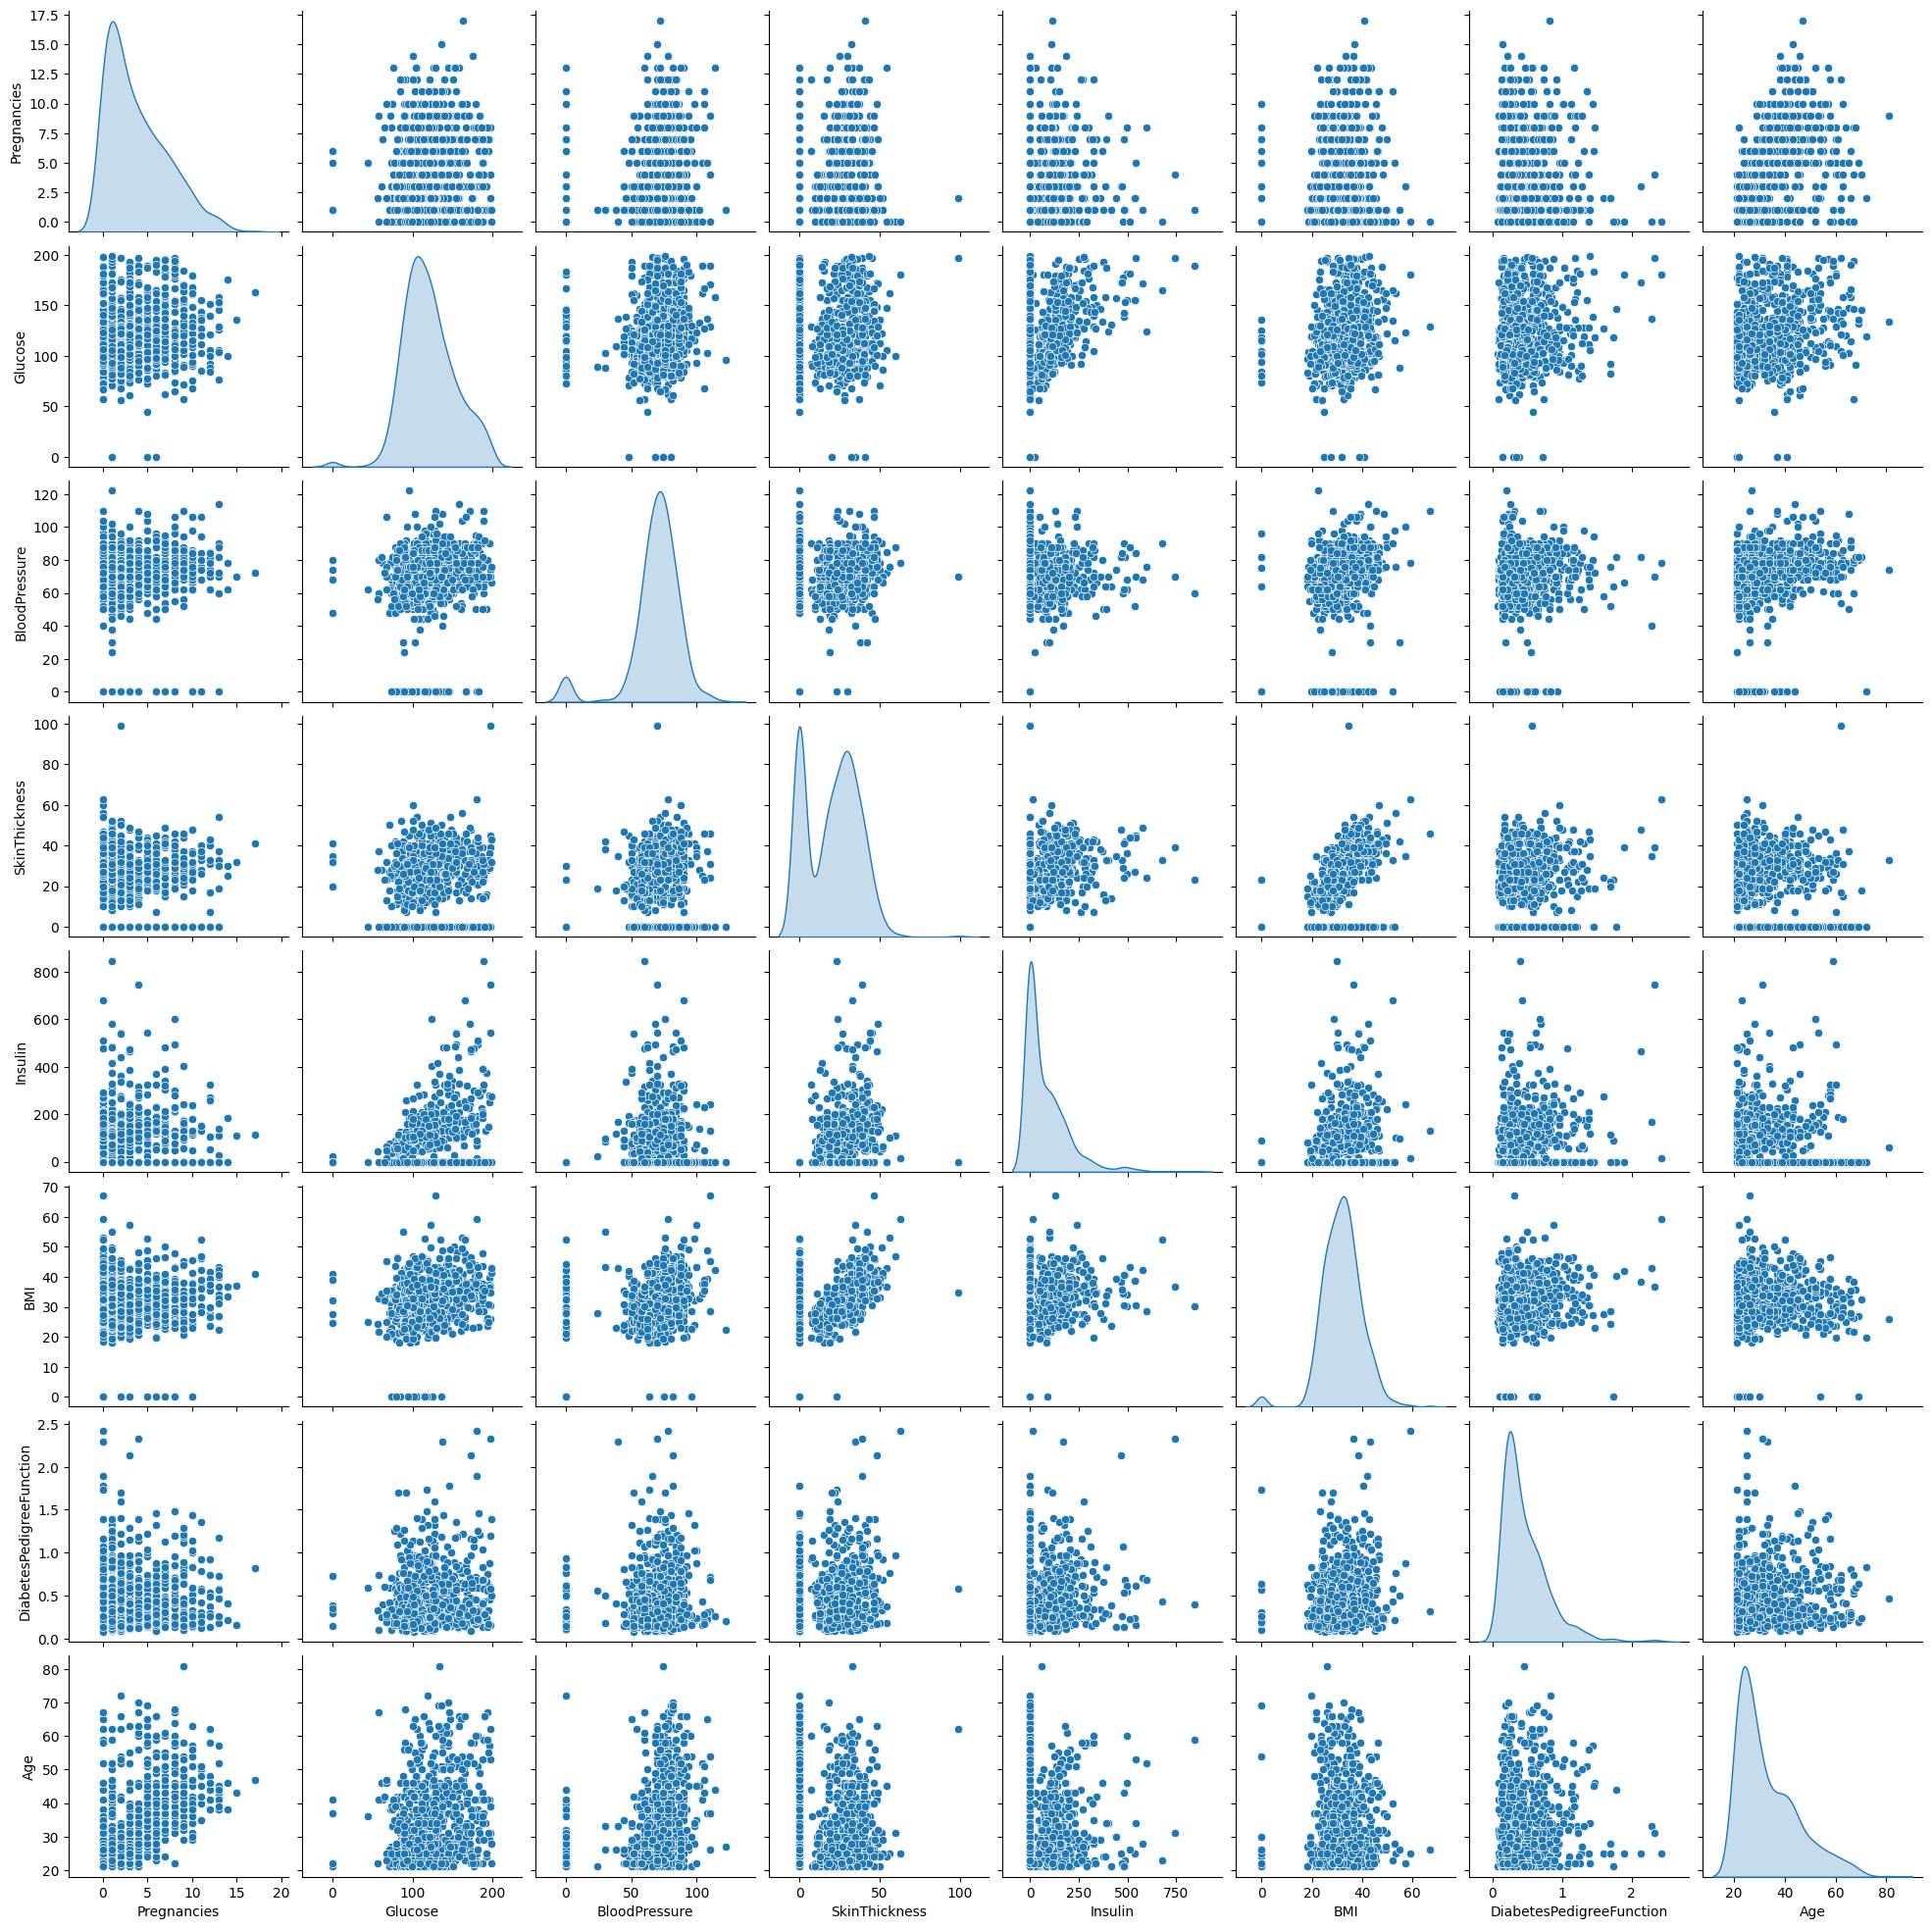

In [63]:
# Visualizing distribution of the data.
sns.pairplot(data=df_diabetes.drop('Outcome', axis=1), diag_kind='kde')

In this case, Standardization is used for the datset because these columns approximately follow a normal distribution.

In [125]:
# Differentiating independent variables and dependent variable.
X = df_diabetes.drop('Outcome', axis=1).values
Y = df_diabetes['Outcome'].values

# Reshaping X and Y to have the same number of samples.
X = X.reshape(-1,X.shape[1])
Y = Y.reshape(-1,1)

In [126]:
# Splitting datset into training and testing set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [127]:
# Standardising the BMI and Blood Pressure columns.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
# Initailizing the model.
person_progression_multi_model = LinearRegression()

In [129]:
# Fitting the model to training data.
person_progression_multi_model.fit(X_train, Y_train)

LinearRegression()

In [130]:
# Predicting the Outcome.
Y_pred = person_progression_multi_model.predict(X_test)

In [131]:
# Creating line coordinates.
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = person_progression_multi_model.predict(X_line)

print('Intercept: \n', person_progression_multi_model.intercept_)
print('Coefficients: \n', person_progression_multi_model.coef_)

Intercept: 
 [0.34690554]
Coefficients: 
 [[ 0.03465559  0.1803234  -0.04219339  0.00820563 -0.03230381  0.11631364
   0.03744793  0.07425473]]


In [132]:
# Generating predictions.
Y_pred[0:5]

array([[0.33550028],
       [0.23809869],
       [0.1510522 ],
       [0.2401365 ],
       [0.48142376]])

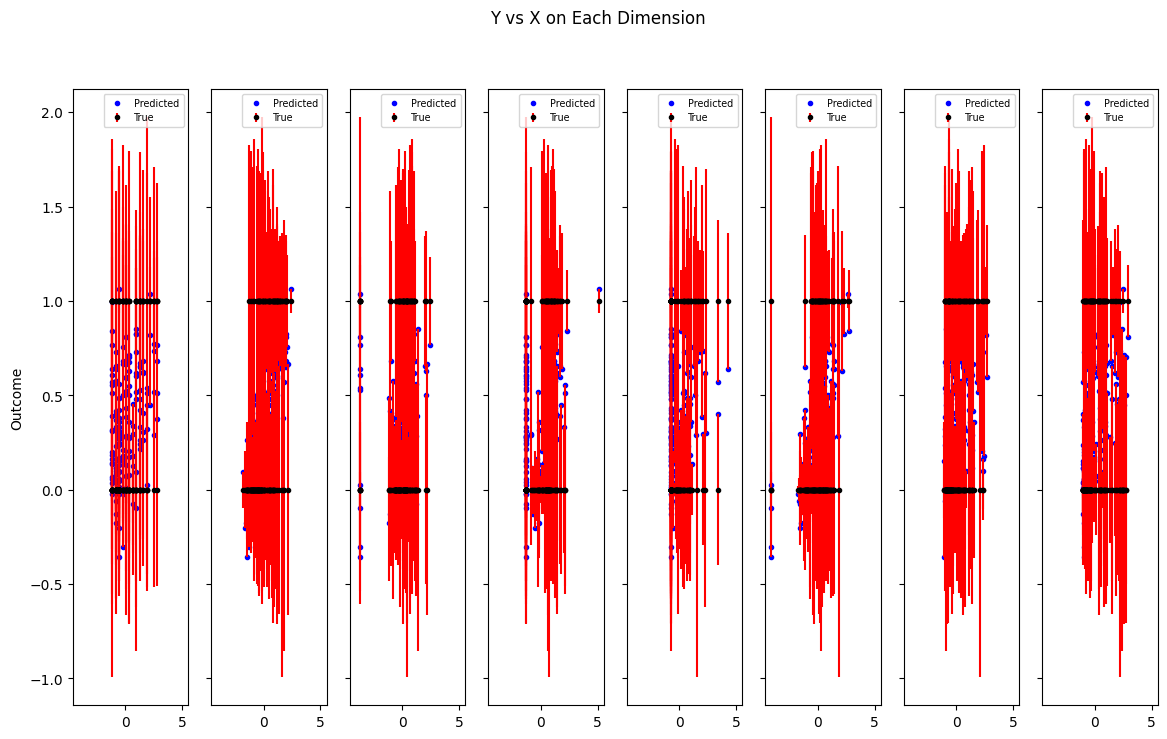

In [134]:
## Visualizing the errors.
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(14,8))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(df_diabetes.columns[-1])

# Getting values for the error bar.
error_bar_values = np.abs((Y_test-Y_pred)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], Y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], Y_pred[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [135]:
# R2-squared score.
print ("R2 Score:", round (person_progression_multi_model.score(X_test, Y_test), 4))

R2 Score: 0.255


Low R2-squared score suggests that the model is not performing well in explaining the variance in the target variable, and further investigation may be needed to improve the model's performance.

To make more meaningful the interpretation of predictions:
1. Identifying which features contribute most to the predictions.
2. Creating visualizations to understand the relationship between features and predictions.
3. Domain Knowledge.
4. Analyzing prediction errors to identify patterns or outliers.
